In [40]:
import numpy as np
import scipy.fft as sf
import scipy.signal as ss
import matplotlib.pyplot as plt
%matplotlib widget
import scipy

scipy.__version__

# random seed to have same result
np.random.seed(0)

# SciPy implementation of Welch method

`scipy.signal` provide an implementation of [Welch method](https://en.wikipedia.org/wiki/Welch%27s_method) to estimate sprectum of signal with function [welch()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html#scipy.signal.welch). The documentation indicates 2 kinds of scaling

> 
> scaling{ ‘density’, ‘spectrum’ }, optional
> 
>     Selects between computing the power spectral density (‘density’) where Pxx has units of V**2/Hz and computing the squared magnitude spectrum (‘spectrum’) where Pxx has units of V**2, if x is measured in V and fs is measured in Hz. 
> Defaults to ‘density’
> 

We also can choice the type of windows (parameter `window`) to avoid discontinuities in the signal cut into chunks.


Start with squared magnitude spectrum, we study it with a white noise.

In [41]:
np.random.seed(5)
nb_s = 30000
sigma = 20
noise = np.random.normal(0,sigma,nb_s)
print("Variance of the noise: ", np.var(noise))

Variance of the noise:  402.0426798742416


##  Square Magnitude Spectrum

### With rectangle window "boxcar"

This windows is flat, it's like "no window"

Déviation standard estimée avec normalisation n_periodogram/2 : 20.071363110135184


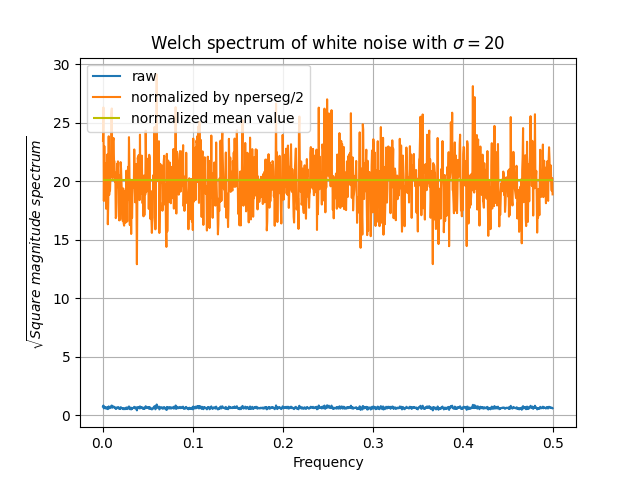

In [42]:
# number of sample in periodogram
nperseg=2048
freq , specw_noise = ss.welch(noise, window="boxcar", scaling="spectrum", nperseg=nperseg)
plt.figure()
plt.title('Welch spectrum of white noise with $\sigma=20$')
plt.plot(freq[1:-2] , np.sqrt(specw_noise[1:-2]), label="raw")
plt.plot(freq[1:-2] , np.sqrt(specw_noise[1:-2]*nperseg/2), label="normalized by nperseg/2")
plt.xlabel('Frequency')
plt.ylabel(r'$\sqrt{Square\ magnitude\ spectrum}$')
plt.grid()
var_spec = specw_noise[1:-2].mean()*nperseg/2
plt.hlines(np.sqrt(var_spec),0,freq[-1] , colors="y", label="normalized mean value")
plt.legend()
print("Déviation standard estimée avec normalisation n_periodogram/2 :",np.sqrt(var_spec))

Where `nperseg` is a parameter of Welch method to define the size of chunk of time serie to compute periodogram.

#### Conclusion

To retrieve the right value of the variance of white noise, we must multiply the return spectrum by `nperseg/2`.



### with window hann 

Déviation standard estimée avec normalisation n_periodogram/2 : 24.636322034606362


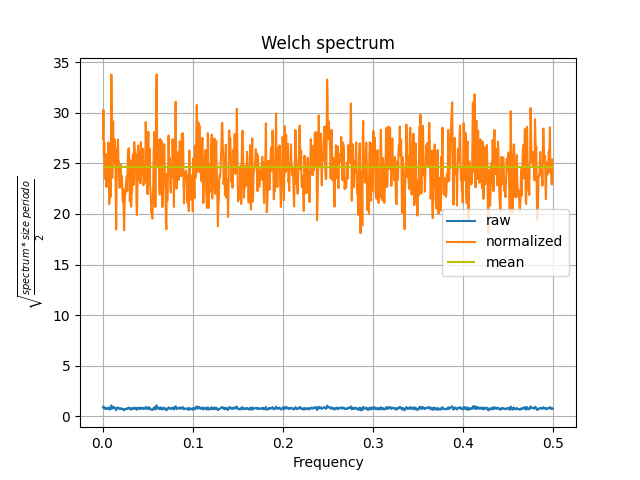

In [43]:
freq , specw_noise = ss.welch(noise, window="hann", scaling="spectrum", nperseg=nperseg)

plt.figure()
plt.title('Welch spectrum')
plt.plot(freq[1:-2] , np.sqrt(specw_noise[1:-2]), label="raw")
plt.plot(freq[1:-2] , np.sqrt(specw_noise[1:-2]*nperseg/2), label="normalized")
plt.xlabel('Frequency')
plt.ylabel(r'$\sqrt{\frac{spectrum*size\ periodo}{2}}$')
plt.grid()
var_spec = specw_noise[1:-2].mean()*nperseg/2
plt.hlines(np.sqrt(var_spec),0,freq[-1] , colors="y", label="mean")
plt.legend()

print("Déviation standard estimée avec normalisation n_periodogram/2 :",np.sqrt(var_spec))

The previous normalization does not work here.

#### Sum of window 

In [44]:
hann = ss.get_window('hann', nperseg)
print("hann sum:",hann.sum())
boxcar = ss.get_window('boxcar', nperseg)
print("boxcar sum:",boxcar.sum())
print("taylor sum:",ss.get_window('taylor', nperseg).sum())

hann sum: 1024.0
boxcar sum: 2048.0
taylor sum: 1314.8145586042851


#### Conclusion 

Not clear if you don't use "boxcar" window ..., there is a normalization specific to the window used, see perhaps in more detail the **Notes** paragraph of the Welch function documentation. 


The situation is simpler with the power spectrum density

## PSD : Power Spectrum Density

With value `density` for the parameter `scaling`. Define also the frequency sampling at 1Hz.

### With rectangle window "boxcar"


20.043168618135077


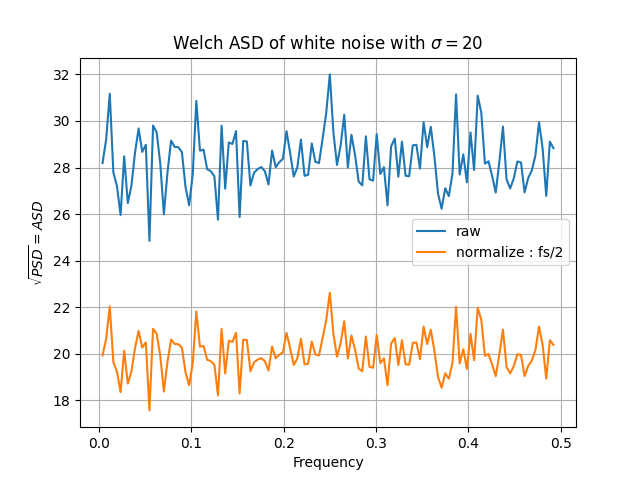

In [45]:
nperseg=256
fs=1.0
freq, psdw_noise = ss.welch(noise,  window="boxcar", fs=fs, scaling="density", nperseg=nperseg)

plt.figure()
plt.title('Welch ASD of white noise with $\sigma=20$')
plt.plot(freq[1:-2], np.sqrt(psdw_noise[1:-2]), label="raw")
plt.plot(freq[1:-2], np.sqrt(psdw_noise[1:-2]*fs/2), label="normalize : fs/2")
plt.xlabel('Frequency')
plt.ylabel(r'$\sqrt{PSD}=ASD$')
plt.grid()
plt.legend()
v_mean = psdw_noise[1:-2].mean()
print(np.sqrt(v_mean*fs/2))

### With window "Hann"

Define also the frequency sampling at 10Hz.

80.31298273401184
20.039084651501906


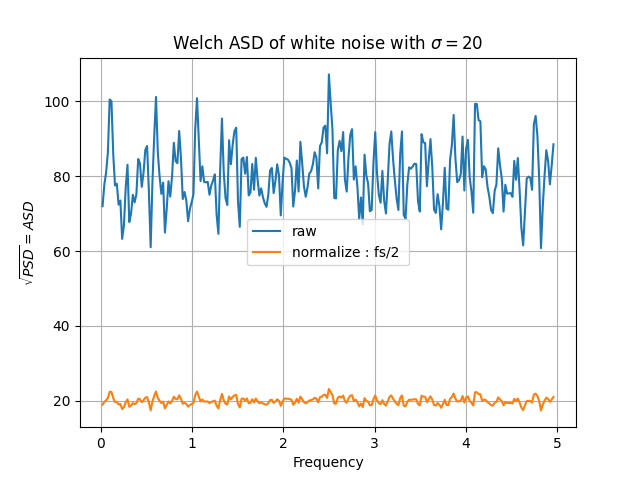

In [47]:
fs=10
freq, specw_noise = ss.welch(noise, fs=10.0, scaling="density", nperseg=512)
plt.figure()
plt.title('Welch ASD of white noise with $\sigma=20$')
plt.plot(freq[1:-2], specw_noise[1:-2], label="raw")
plt.plot(freq[1:-2], np.sqrt(specw_noise[1:-2]*fs/2), label="normalize : fs/2 ")
plt.xlabel('Frequency')
plt.ylabel(r'$\sqrt{PSD}=ASD$')
plt.legend()
plt.grid()
v_mean = specw_noise[1:-2].mean()
print(v_mean )
print(np.sqrt(v_mean*fs/2))

### Conclusion 

The PSD estimation is independant of the window and the normalization to retrieve the  
level of standard deviation is 

$\sigma_{nor}=\sigma_{psd} \sqrt{\frac{f_s}{2}}$
